In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

plt.style.use('../maroon_ipynb.mplstyle')

![Figure 1](f1.png)

For the circuit above, the transfer function results in

$$\frac{V_o(s)}{V_s(s)}=\frac{1}{C^{2} R^{2} s^{2} + 3 C R s + 1}$$

For $C=5\,\mu F$ and $R=300\,\Omega$, find the bandwidth.

In [2]:
C, R = 5e-6, 300
T = ct.tf(1, [C**2*R**2, 3*C*R, 1])
T

TransferFunction(array([1]), array([2.25e-06, 4.50e-03, 1.00e+00]))

In [3]:
omegas = np.linspace(1, 100_000, 1_000_000)
mag, phase, _ = ct.frequency_response(T, omegas)

zeta = 3*R*C/(2*np.sqrt(C**2*R**2))
zeta

1.5

From above, it is apparent the maximum magnitude occurs at $\omega=0$ because the damping ratio is greater than 1 (refer to the figure on page 564). We can still use the usual method for finding the bandwidth, but we note that $\omega_1=0$ rad/s, the characteristic of a low-pass filter.

In [4]:
def find_band(om):
    mag_, _, _ = ct.frequency_response(T, om)
    mag_ = mag_[0]
    return mag_ - 1/np.sqrt(2)  # M_peak = 1

w2 = fsolve(find_band, np.array([200, ]))[0]
w2  # rad/s

249.4927695592348

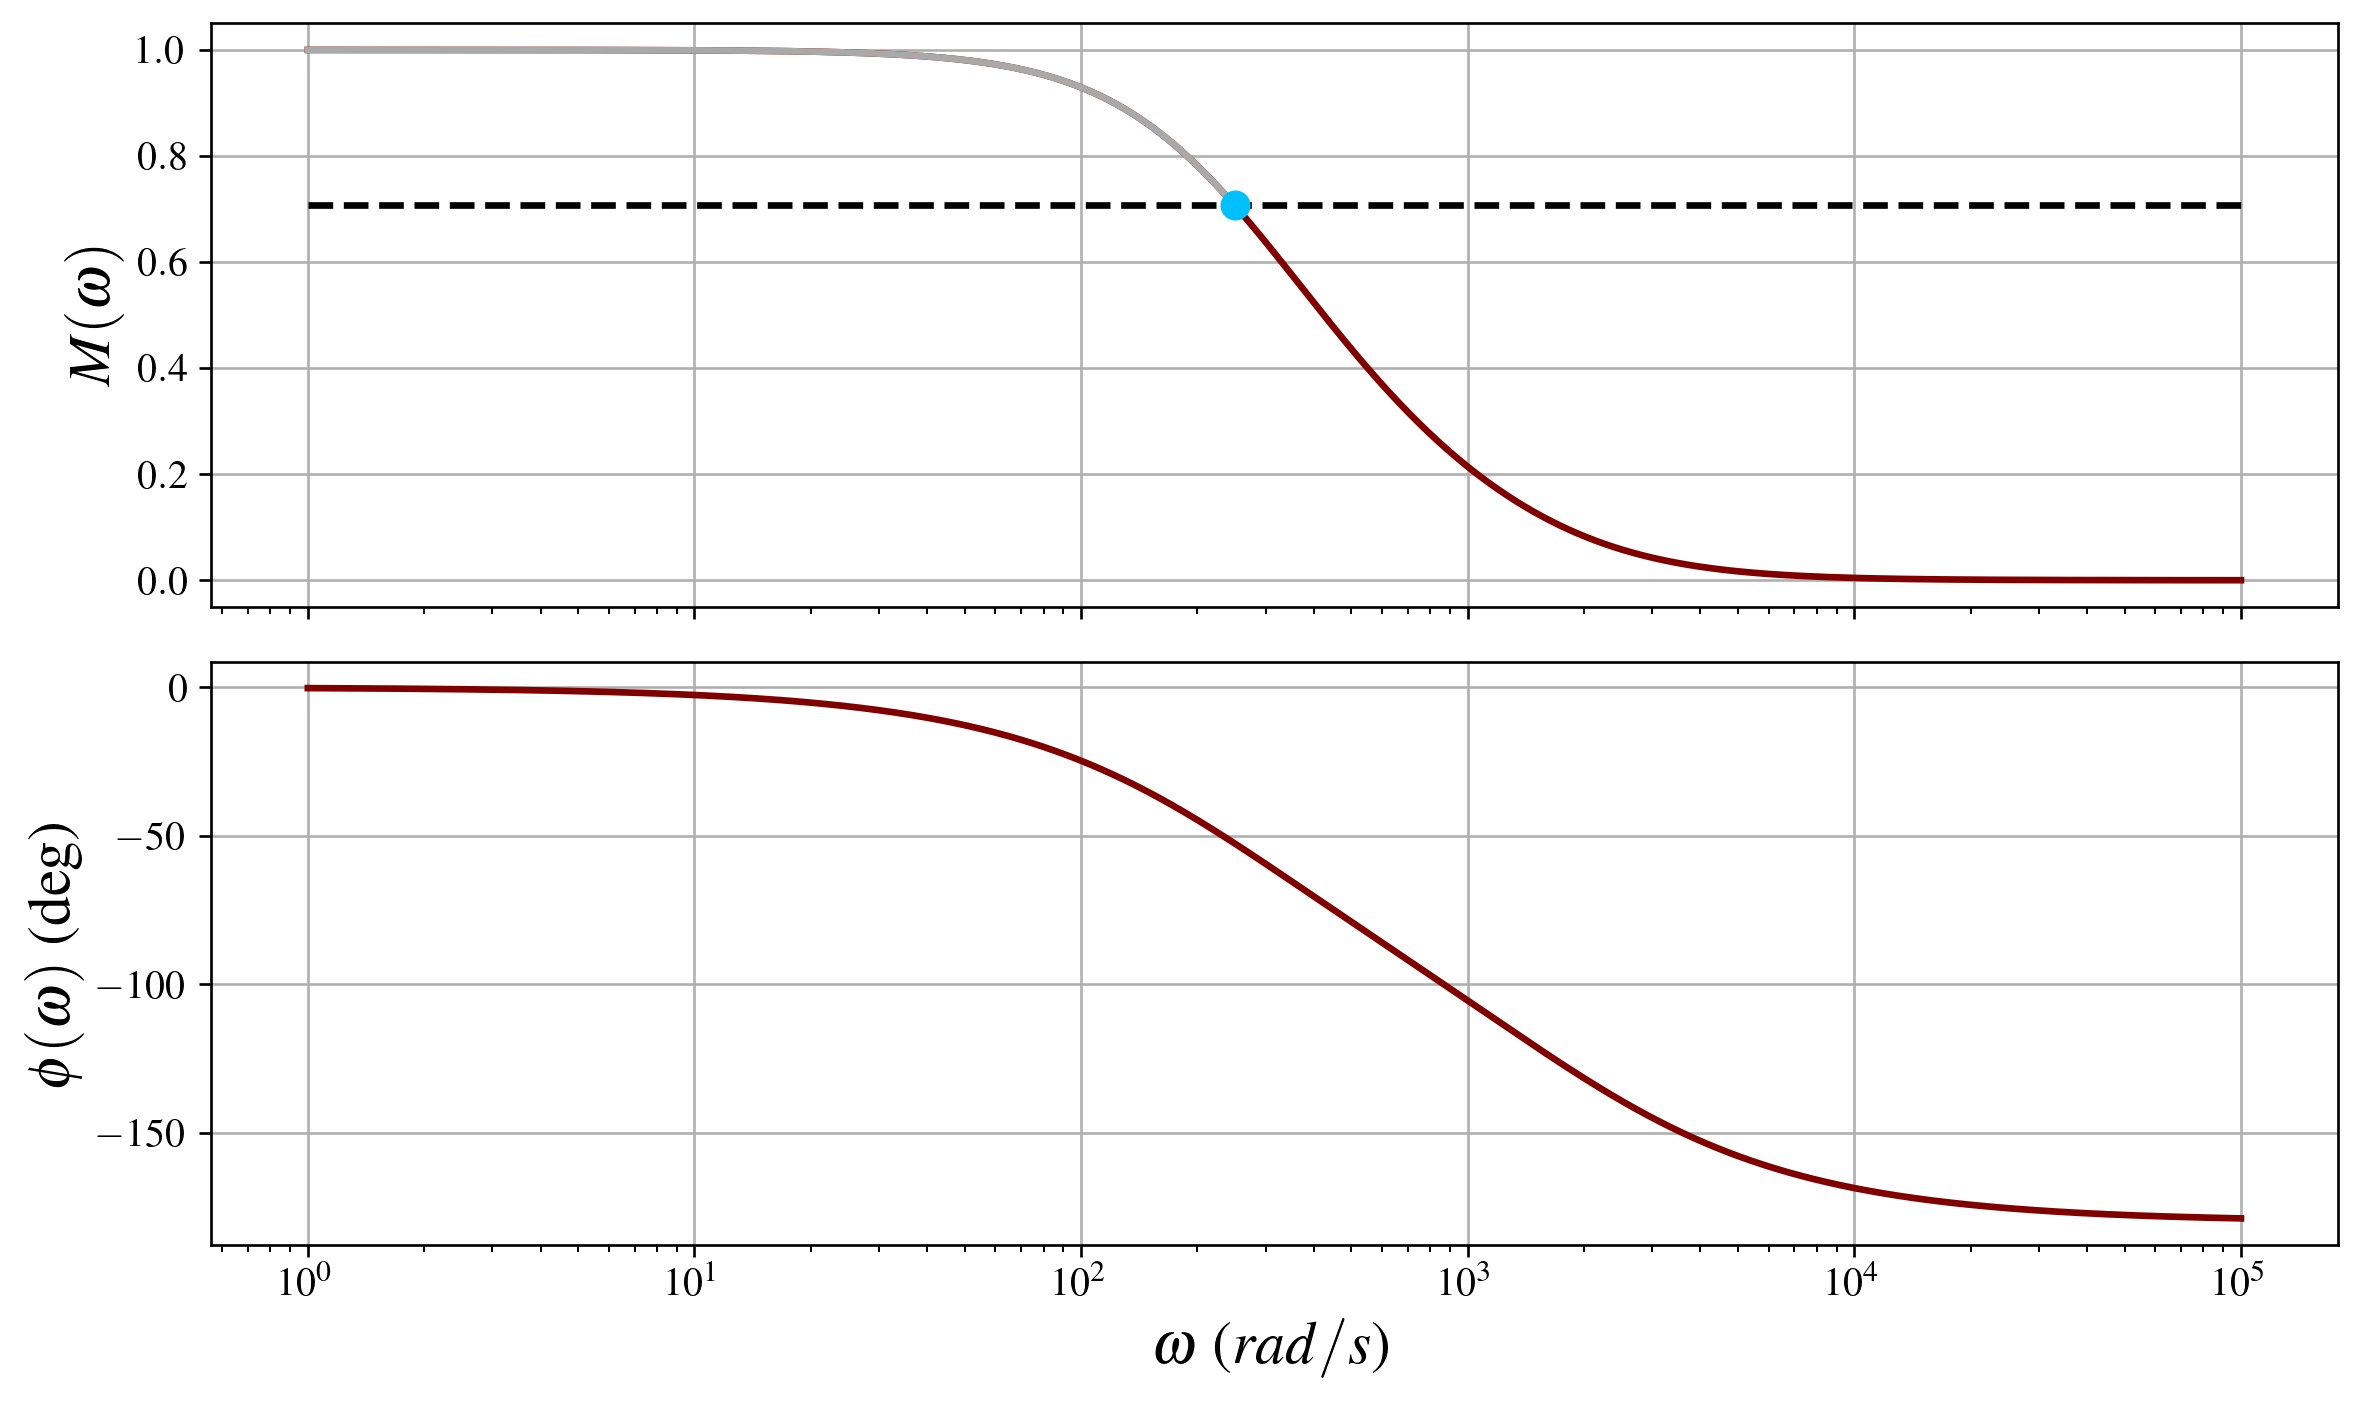

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)
ax1.set_xscale('log')

ax1.plot(omegas, mag, zorder=2)
ax1.plot([omegas[0], omegas[-1]], [1/np.sqrt(2), 1/np.sqrt(2)], ls='--', zorder=2)
ax1.plot(omegas[omegas <= w2], mag[omegas <= w2], zorder=2)
ax1.scatter(w2, 1/np.sqrt(2), zorder=3, color='deepskyblue')
ax1.set_ylabel(r'$M(\omega)$')

ax2.plot(omegas, np.rad2deg(phase))
ax2.set_ylabel(r'$\phi(\omega)$ (deg)')
ax2.set_xlabel(r'$\omega$ ($rad/s$)')
plt.show()

Thus, the bandwidth is $0\le\omega\le250$ rad/s.